<a href="https://colab.research.google.com/github/Zach-Twedt/hello-world/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("http://fengmai.net/download/data/telco_churn.csv.gz")
selected_features = ["gender","SeniorCitizen","Partner","Dependents",
"tenure","Contract",
"InternetService","PhoneService",
"MonthlyCharges","PaymentMethod"]
df = df[selected_features]

**Clustering Analysis**

1.1 Implement Two Clustering Methods

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv("http://fengmai.net/download/data/telco_churn.csv.gz")
selected_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "tenure",
                    "Contract", "InternetService", "PhoneService", "MonthlyCharges", "PaymentMethod"]
df = df[selected_features]

K-means Silhouette Score with 4 clusters: 0.209


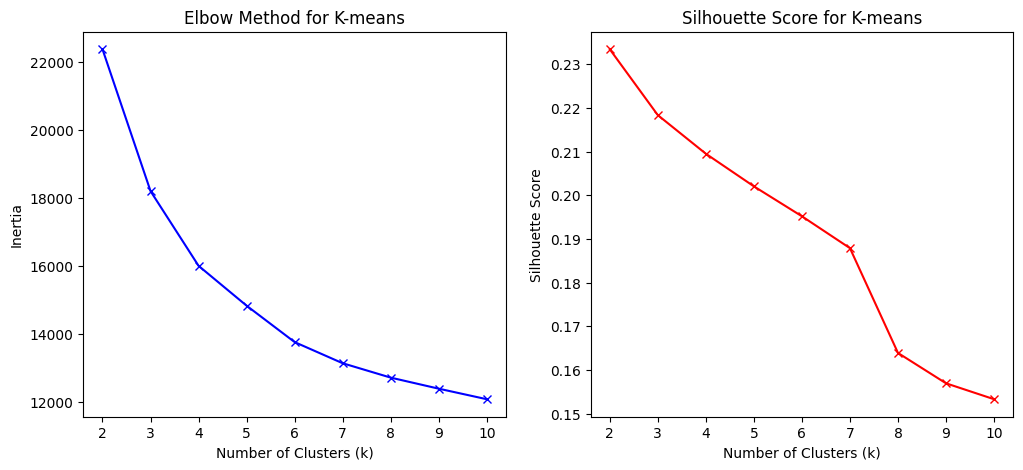

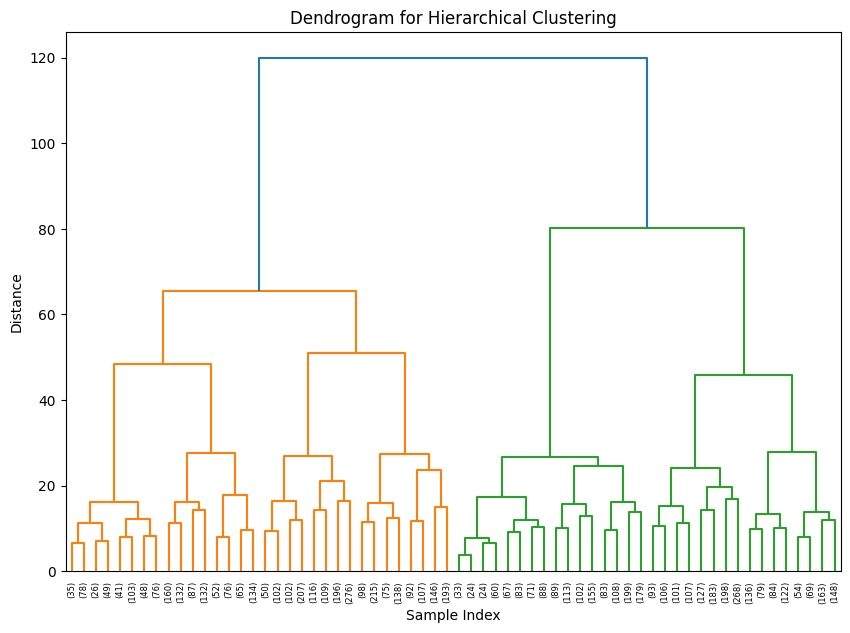

Hierarchical Clustering Silhouette Score with 4 clusters: 0.163

Cluster Quality Comparison:
K-means Silhouette Score: 0.209
Hierarchical Clustering Silhouette Score: 0.163
Best Performing Method: K-means


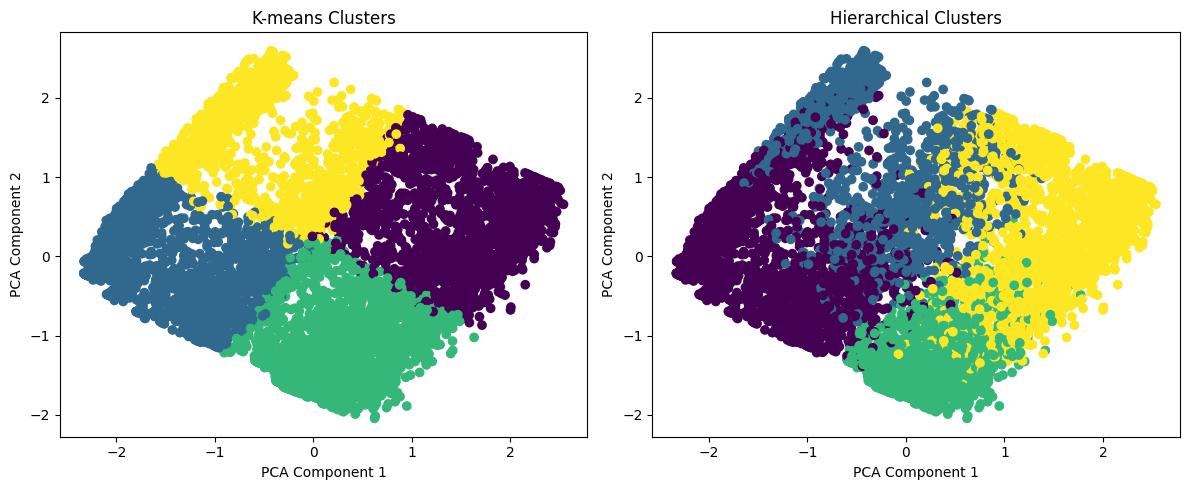

In [7]:
# Data Preprocessing
# Identify categorical and numerical columns
categorical_cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "Contract",
                    "InternetService", "PhoneService", "PaymentMethod"]
numerical_cols = ["tenure", "MonthlyCharges"]

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols) # Change sparse to sparse_output
    ])

# Apply preprocessing
X = preprocessor.fit_transform(df)

# 1.1 Clustering Analysis
# K-means Clustering
# Elbow Method to find optimal number of clusters
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-means')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K[0:], silhouette_scores, 'rx-') # Change K[1:] to K to align with silhouette_scores
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means')

# Choose optimal k (e.g., based on elbow or max silhouette score)
optimal_k = 4  # Adjust based on visual inspection or max silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print(f"K-means Silhouette Score with {optimal_k} clusters: {kmeans_silhouette:.3f}")

# Hierarchical Clustering
# Dendrogram to determine number of clusters
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Choose number of clusters (e.g., based on dendrogram)
optimal_hc_clusters = 4  # Adjust based on dendrogram
# Remove affinity parameter as it is not needed for ward linkage
hc = AgglomerativeClustering(n_clusters=optimal_hc_clusters, linkage='ward')
hc_labels = hc.fit_predict(X)
hc_silhouette = silhouette_score(X, hc_labels)
print(f"Hierarchical Clustering Silhouette Score with {optimal_hc_clusters} clusters: {hc_silhouette:.3f}")


# Compare Cluster Quality
print("\nCluster Quality Comparison:")
print(f"K-means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"Hierarchical Clustering Silhouette Score: {hc_silhouette:.3f}")
best_method = "K-means" if kmeans_silhouette > hc_silhouette else "Hierarchical Clustering"
print(f"Best Performing Method: {best_method}")

# Optional: Visualize Clusters (using first two numerical features for simplicity)
# Apply PCA for visualization (if needed, for high-dimensional data)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='viridis')
plt.title('Hierarchical Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

1.2 Cluster Interpretation

In [8]:
# 1.1 Clustering Analysis
# K-means Clustering
optimal_k = 4  # Adjust based on visual inspection or max silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)


# Hierarchical Clustering
optimal_hc_clusters = 4  # Adjust based on dendrogram
hc = AgglomerativeClustering(n_clusters=optimal_hc_clusters, linkage='ward')
hc_labels = hc.fit_predict(X)

# Get feature names after OneHotEncoding
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Calculate cluster centroids for K-means
kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
print("\nK-means Cluster Centroids:")
display(kmeans_centroids)


# Calculate cluster centroids for Hierarchical Clustering
# For Hierarchical Clustering, we need to calculate the means for each cluster manually
hc_centroids = []
for cluster in range(optimal_hc_clusters):
    cluster_data = X[hc_labels == cluster]
    cluster_mean = cluster_data.mean(axis=0)
    hc_centroids.append(cluster_mean)

hc_centroids = pd.DataFrame(hc_centroids, columns=feature_names)
print("\nHierarchical Clustering Cluster Centroids:")
display(hc_centroids)


K-means Cluster Centroids:


,tenure,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PhoneService_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.085100,0.956805,0.505722,0.209809,0.712807,0.346594,0.340054,0.419619,7.013624e-01,6.245005e-15,0.999455,0.330245,0.277929,0.070845
1,-0.848917,-0.962287,0.524497,0.070139,0.304796,0.288293,0.197524,0.075812,1.038059e-14,4.347602e-01,0.808664,0.142341,0.222795,0.502321
2,-0.697490,0.629949,0.486341,0.262439,0.335610,0.160976,0.075122,0.011220,8.824390e-01,6.633583e-15,0.999024,0.123902,0.625854,0.103902
3,0.897969,-0.977862,0.502483,0.068709,0.667219,0.475166,0.257450,0.616722,-6.106227e-15,5.604305e-01,0.746689,0.318709,0.115894,0.237583



Hierarchical Clustering Cluster Centroids:


,tenure,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PhoneService_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.713463,-0.956712,0.525203,0.065707,0.345185,0.311431,0.215122,0.097660,0.000000,0.478848,0.842034,0.167417,0.252475,0.431593
1,0.754620,-0.619777,0.477589,0.098145,0.630603,0.429675,0.350850,0.481453,0.000773,0.352396,0.746522,0.301391,0.129830,0.255023
2,-0.858997,0.648244,0.468877,0.283491,0.345061,0.170501,0.006089,0.000677,0.998647,0.000000,1.000000,0.128552,0.625846,0.123816
3,0.921705,0.966487,0.525515,0.220805,0.637880,0.293916,0.260550,0.414132,0.794406,0.000000,0.999509,0.279195,0.348871,0.064769


Key Distinguishing Features / Segmentation

In [11]:
# Data Preprocessing
categorical_cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "Contract",
                    "InternetService", "PhoneService", "PaymentMethod"]
numerical_cols = ["tenure", "MonthlyCharges"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

X = preprocessor.fit_transform(df)

# Clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

optimal_hc_clusters = 4
hc = AgglomerativeClustering(n_clusters=optimal_hc_clusters, linkage='ward')
hc_labels = hc.fit_predict(X)

# Get feature names
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Calculate centroids
kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
hc_centroids = []
for cluster in range(optimal_hc_clusters):
    cluster_data = X[hc_labels == cluster]
    cluster_mean = cluster_data.mean(axis=0)
    hc_centroids.append(cluster_mean)
hc_centroids = pd.DataFrame(hc_centroids, columns=feature_names)

# Cluster names - Customize based on cluster interpretations
cluster_names = {
    0: "Loyal High-Value Customers",
    1: "Basic Budget Customers",
    2: "New Fiber Fanatics",
    3: "Traditional Phone Users"
}

# --- Interpretation (Focus on K-means for this example) ---
print("\nInterpreting K-means Clusters:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} ({cluster_names[cluster]}):")
    centroid_values = kmeans_centroids.iloc[cluster]

    # Numerical features
    print("  Numerical Features:")
    for feature in numerical_cols:
        value = centroid_values[feature]
        # Invert scaling for better interpretation (if needed)
        if feature in preprocessor.named_transformers_['num'].get_feature_names_out():
            original_value = preprocessor.named_transformers_['num'].inverse_transform(
                centroid_values[numerical_cols].values.reshape(1, -1)
            )[0][numerical_cols.index(feature)]
            print(f"    {feature}: {original_value:.2f} (scaled: {value:.2f})")
        else:
            print(f"    {feature}: {value:.2f}")

# Categorical features
print("  Categorical Features:")
for feature in categorical_cols:
    # Find the category with the highest value for this cluster
    # Pass the original categorical_cols list instead of a single feature
    encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

    # Filter encoded feature names for the current feature
    relevant_encoded_features = [name for name in encoded_feature_names if name.startswith(feature + '_')]

    max_category_index = centroid_values[relevant_encoded_features].idxmax()
    max_category = max_category_index.split('_')[1]  # Extract the category name
    print(f"    {feature}: Likely '{max_category}'")


Interpreting K-means Clusters:

Cluster 0 (Loyal High-Value Customers):
  Numerical Features:
    tenure: 59.05 (scaled: 1.09)
    MonthlyCharges: 93.58 (scaled: 0.96)

Cluster 1 (Basic Budget Customers):
  Numerical Features:
    tenure: 11.59 (scaled: -0.85)
    MonthlyCharges: 35.85 (scaled: -0.96)

Cluster 2 (New Fiber Fanatics):
  Numerical Features:
    tenure: 15.30 (scaled: -0.70)
    MonthlyCharges: 83.75 (scaled: 0.63)

Cluster 3 (Traditional Phone Users):
  Numerical Features:
    tenure: 54.46 (scaled: 0.90)
    MonthlyCharges: 35.38 (scaled: -0.98)
  Categorical Features:
    gender: Likely 'Male'
    SeniorCitizen: Likely '1'
    Partner: Likely 'Yes'
    Dependents: Likely 'Yes'
    Contract: Likely 'Two year'
    InternetService: Likely 'No'
    PhoneService: Likely 'Yes'
    PaymentMethod: Likely 'Credit card (automatic)'
